In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/CLEANED_DATASET1.csv")
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience,TARGET
0,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,1,0,36.0,6.0,0
1,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,49.0,1.0,0
2,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,1,1,1,54.0,3.0,0
3,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,1,1,41.0,5.0,0
4,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,1,1,1,47.0,15.0,0


In [6]:
df["TARGET"].value_counts()

1    513096
0    511332
Name: TARGET, dtype: int64

In [10]:
X=df.drop("TARGET",axis=1)
y=df["TARGET"]

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a base learner (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1)  # Shallow decision tree as a weak learner

# Initialize the AdaBoost classifier with the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    102414
           1       1.00      1.00      1.00    102472

    accuracy                           1.00    204886
   macro avg       1.00      1.00      1.00    204886
weighted avg       1.00      1.00      1.00    204886



In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)



Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    102414
           1       1.00      1.00      1.00    102472

    accuracy                           1.00    204886
   macro avg       1.00      1.00      1.00    204886
weighted avg       1.00      1.00      1.00    204886



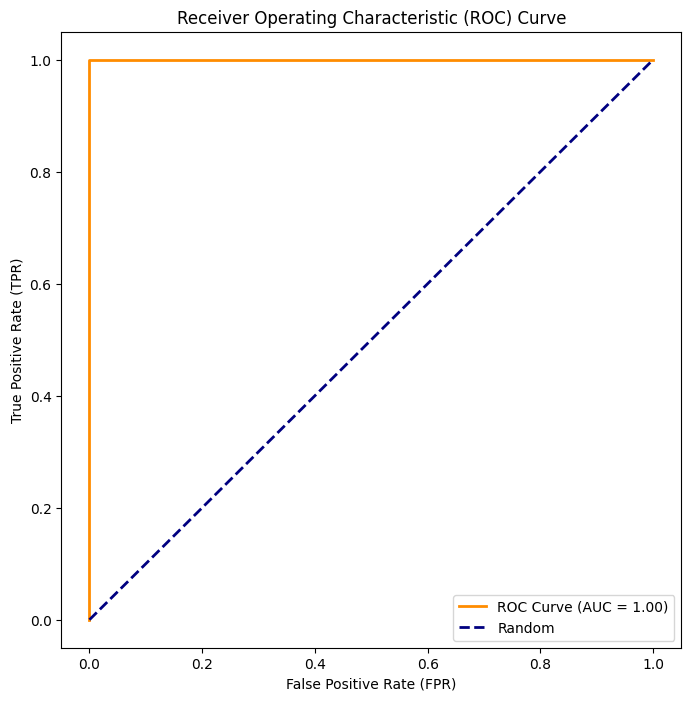

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [17]:

import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    102414
           1       1.00      1.00      1.00    102472

    accuracy                           1.00    204886
   macro avg       1.00      1.00      1.00    204886
weighted avg       1.00      1.00      1.00    204886

